# Get MNIST data

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Check dataset

In [5]:
mnist.train.images.shape# training dataset, 28*28 image

(55000, 784)

In [7]:
mnist.train.labels.shape# training label, one-hot

(55000, 10)

In [10]:
mnist.validation.images.shape, mnist.test.images.shape

((5000, 784), (10000, 784))

In [11]:
mnist.train.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

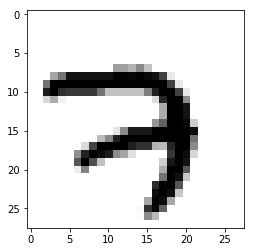

In [14]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numpy import *

img = mnist.train.images[0]
#list to array
array_img = array(img)
#array to matrix
m_img = array_img.reshape(28,28)


plt.imshow(m_img, cmap=cm.binary)
plt.show()


# SoftMax Regression

In [20]:
import tensorflow as tf

# Model
x = tf.placeholder(tf.float32, [None, 784]) # None means that a dimension can be of any length.
W = tf.Variable(tf.zeros([784, 10])) # multiply the 784-dimensional image vectors by it to produce 10-dimensional vectors of evidence for the difference classes
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)


# Train: cost function optimization
y_ = tf.placeholder(tf.float32, [None, 10]) # y_true
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])) # define cost-function
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)# init learn_rate=0.5
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for _ in range(1000):# training times
    batch_xs, batch_ys = mnist.train.next_batch(100)# batch size
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})# y_: y_true
    
    
# evaluation
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))# y: y_pred, y_:y_true
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9185


In [21]:
batch_xs.shape

(100, 784)